#        **Predictive Analytics for E-commerce Project Report**

                                                                   UBIT NAME: bungata
                                                                   Person No: 50495142
                                                                   UBITNAME: dkondrag
                                                                   Person No: 50496495
                                                                   course num: EAS 587


# Summary:
This report presents the findings and progress of a predictive analytics project. The project's objective is to enhance the e-commerce experience by utilizing data-driven insights. To achieve this goal, historical transaction data is leveraged to develop a predictive model. This model aids in sales forecasting and analyzing customer behavior patterns.
# Introduction:
The e-commerce industry is characterized by its dynamic nature and intense competition, which necessitates the adoption of predictive analytics. These analytics provide invaluable insights that can be acted upon. The primary aim of this project is to develop a robust predictive model capable of forecasting sales, discerning customer preferences, and ultimately enhancing decision-making on the e-commerce platform.
Data Collection and Description:
# Data Sources:
To conduct this project, we utilized data from the Online Retail II dataset. This dataset contains valuable information about transactions made by customers of a UK-based online retail company.
# Data Variables:
Invoice Details:
Invoice Number
Invoice Date
Customer ID
Product Information:
Product Code
Description
Unit Price
Quantity
Customer Information:
Customer ID
Country
# Data Cleaning and Preprocessing: 
In the data preprocessing stage, several crucial steps were undertaken. These steps included addressing missing values, eliminating duplicates, and transforming variables to ensure accurate and reliable results.
# Data Transformation:
Converted data types for better analysis (e.g., Date to DateTime).
Created new features, such as total transaction amount.
Dealing with Missing Data: We addressed the issue of missing values in important fields like Customer ID and Description.Data Transformation: I converted data types to improve analysis, such as changing the date format to include time information. Additionally, I created new features, like calculating the total transaction amount.
Exploratory Data Analysis (EDA):
Exploratory data analysis (EDA) plays a crucial role in understanding the characteristics of a dataset and uncovering meaningful patterns.
# Descriptive Statistics:
Total Transactions: 532,618
Unique Products: 4,372
Unique Customers: 5,887
Countries: 38
Key Insights:
# Sales Distribution: 
The total sales distribution exhibits a pattern skewed towards the right, which indicates that there is a concentration of transactions with lower values.
The distribution of total sales shows a pattern where lower-value transactions are more concentrated, indicating a right-skewed distribution.
# Customer Distribution: 
The majority of customers make infrequent transactions, while a small group of high-frequency customers significantly contribute to the overall sales.
While the majority of customers make transactions infrequently, a small group of high-frequency customers significantly drive overall sales.
Sales are primarily generated from the United Kingdom, with other countries also contributing to a significant portion of sales.
# Country-wise Sales: 
The majority of sales originate from the United Kingdom, followed by other countries.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Read and Load the dataset

In [2]:
try:
    sales = pd.read_csv('data.csv', encoding="utf-8")
except UnicodeDecodeError:
    sales = pd.read_csv('data.csv', encoding="latin1")
sales.head(40)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


Here the Length of the data set we have taken is 541909

In [ ]:
print(len(sales))

541909


1. Drop all Nan Values

In [ ]:
sales.dropna(inplace=True)
print(len(sales))

406829


After Droping the NaN values the length of the data set is 397884.

2.Checking Missing Values

In [ ]:
missing_invoice_dates = sales[sales["InvoiceDate"].isnull()]
print(missing_invoice_dates)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


3. Cleaning InvoiceNo

In [ ]:
sales['InvoiceNo'] = sales['InvoiceNo'].astype(str).str.strip() 
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


After Cleaning the Invoice no it looks like integer Values

4.  Cleaning StockCode

In [ ]:
sales['StockCode'] = sales['StockCode'].str.strip() 
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


5. Data types

In [ ]:
print(sales.dtypes)

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object


6. select columns of your intrest

In [ ]:
sales = sales[["InvoiceNo", "StockCode", "Description", "Quantity", "InvoiceDate", "UnitPrice", "CustomerID", "Country"]]
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


 7.  Dropping the Customer Id

In [ ]:
sales['CustomerID'] = sales['CustomerID'].astype(int)
sales

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680,France


In [ ]:
#Change data type of InvoiceDate to DateTime
sales['InvoiceDate']= pd.to_datetime(sales['InvoiceDate'])

8. drop duplicates

In [ ]:

#Dropping the duplicate rows
sales = sales.drop_duplicates()

9. Remove rows with negative or zero Quantity

In [ ]:
sales = sales[sales["Quantity"] > 0]
sales = sales[sales["UnitPrice"] > 0]
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


10. Cleaning Description

In [ ]:
sales['Description'] = sales['Description'].str.strip() 
sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [ ]:
sales.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,392692.000000,392692,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,180.492832,NaN,22.241836,1713.539549


11. Feature Engineering:

In [ ]:

# Add a new feature for the total price
sales["TotalPrice"] = sales["Quantity"] * sales["UnitPrice"]
# Now, you have selected the desired features and added a new feature for total price
sales.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


EDA Analysis 

1. reference date as the most recent purchase date

In [ ]:
most_recent_purchase = max(sales['InvoiceDate'])
most_recent_purchase

Timestamp('2011-12-09 12:50:00')

2.Inspect the First Few Rows

In [ ]:
print(sales.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom       15.30  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom       22.00  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom       20.34  


3. Calculating Recency for each purchase

In [ ]:
sales['Recency'] = sales['InvoiceDate'].apply(lambda row: (most_recent_purchase - row).days)

4. Data Types

In [ ]:

print(sales.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
TotalPrice            float64
Recency                 int64
dtype: object


5.single recency based on their most recent purchase

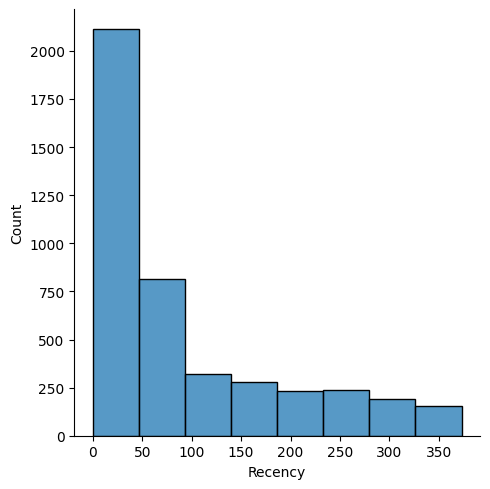

In [ ]:
df_recent = sales.groupby('CustomerID')['Recency'].min()
sns.displot(df_recent,bins=8)

6. Frequency

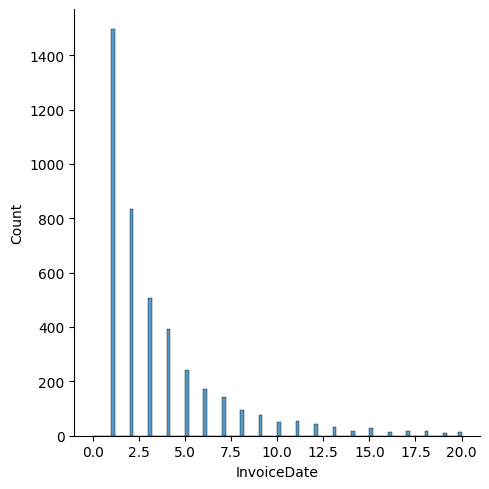

In [ ]:
df_freq = sales.groupby('CustomerID')['InvoiceDate'].nunique()
sns.displot(df_freq,bins=100,binrange=(0,20))

In [ ]:
df_freq.value_counts()

InvoiceDate
1      1495
2       833
3       508
4       391
5       242
6       172
7       142
8        94
9        77
11       53
10       51
12       42
13       31
15       29
17       18
18       17
14       16
20       13
16       12
21       10
19       10
26        7
30        7
25        6
22        6
24        5
27        4
23        4
36        3
33        2
46        2
29        2
55        2
34        2
39        2
44        2
31        2
50        2
28        2
32        2
57        1
91        1
124       1
210       1
38        1
83        1
61        1
93        1
35        1
41        1
47        1
58        1
201       1
73        1
95        1
37        1
54        1
45        1
Name: count, dtype: int64

7. Adding a new column for amount

In [ ]:
sales['Amount'] = sales['UnitPrice']*sales['Quantity']

8. Monetary

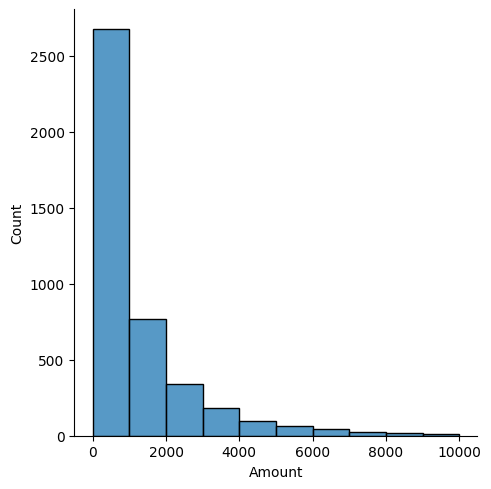

In [ ]:
df_monetary = sales.groupby('CustomerID')['Amount'].sum()
sns.displot(df_monetary,bins=10,binrange=(0,10000))

In [ ]:
df_monetary.value_counts()

Amount
76.32      4
35.40      3
363.65     3
15.00      3
440.00     3
          ..
477.79     1
1530.75    1
605.06     1
183.85     1
1837.28    1
Name: count, Length: 4256, dtype: int64

7. recency vs frequency

In [ ]:
rfm_df = pd.DataFrame(columns=['CustomerID'])

In [ ]:
rfm_df['CustomerID'] = df_recent.index
rfm_df = rfm_df.merge(df_recent,on='CustomerID')

In [ ]:
rfm_df = rfm_df.merge(df_freq,on='CustomerID')
rfm_df = rfm_df.merge(df_monetary,on='CustomerID')
rfm_df.rename(columns={'InvoiceDate':'Frequency'},inplace=True)
rfm_df
rfm_df.describe()

,CustomerID,Recency,Frequency,Amount
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,91.536422,4.250807,2048.688081
std,1721.808492,100.014169,7.635202,8985.230220
min,12346.000000,0.000000,1.000000,3.750000
25%,13813.250000,17.000000,1.000000,306.482500
50%,15299.500000,50.000000,2.000000,668.570000
75%,16778.750000,141.000000,5.000000,1660.597500
max,18287.000000,373.000000,210.000000,280206.020000


<Axes: xlabel='Recency', ylabel='Frequency'>

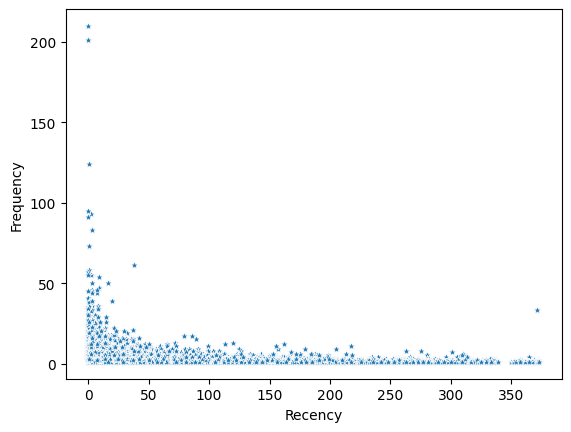

In [ ]:
sns.scatterplot(data=rfm_df, x="Recency", y="Frequency",marker='*')

8. Frequency vs Amount

[(0.0, 10000.0)]

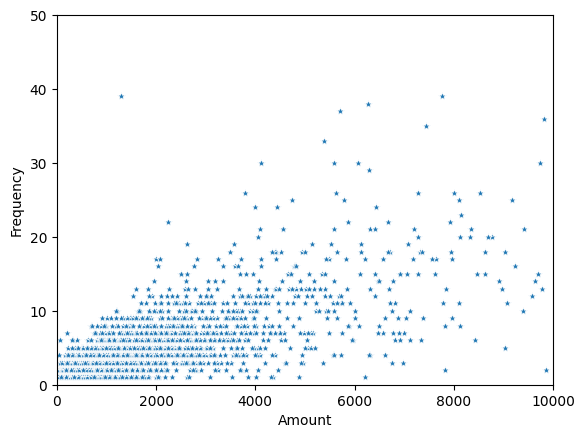

In [ ]:
ax = sns.scatterplot(data=rfm_df, x="Amount", y="Frequency",marker='*')
ax.set(ylim=(0,50))
ax.set(xlim=(0,10000))

8. Month had the highest purchase numbers

<Axes: xlabel='Month'>

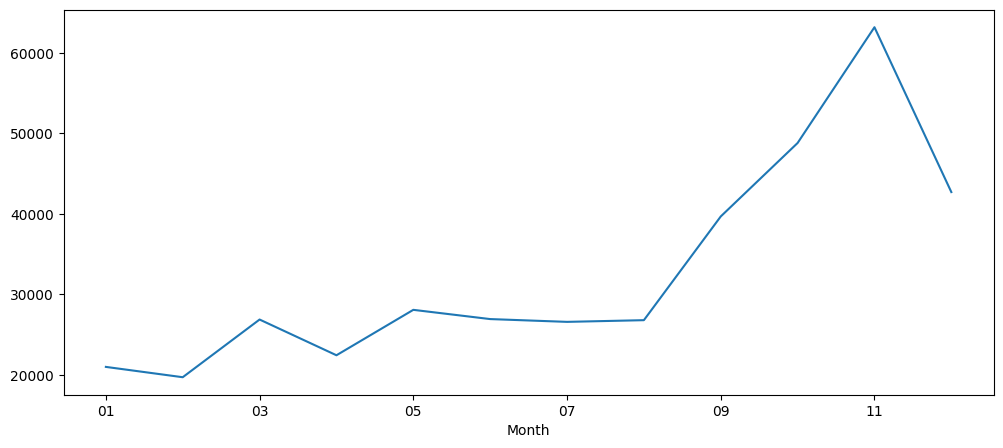

In [ ]:
sales['Month'] = sales['InvoiceDate'].dt.strftime('%m')
sales.sort_values('Month',inplace=True)
sales['Month'].value_counts(sort=False).plot(figsize=(12,5))

9.Correlation Heatmap

       InvoiceNo StockCode                        Description  Quantity  \
55842     541002     84050    PINK HEART SHAPE EGG FRYING PAN         6   
45479     540261     22265    EASTER DECORATION NATURAL CHICK        24   
45480     540261     22457     NATURAL SLATE HEART CHALKBOARD        48   
45481     540261     21385    IVORY HANGING DECORATION  HEART        24   
45482     540261     22469              HEART OF WICKER SMALL        48   
...          ...       ...                                ...       ...   
27421     538558    90120D        WHITE MURANO TWIST BRACELET         1   
27422     538558     70007          HI TEC ALPINE HAND WARMER        30   
27423     538558     70006           LOVE HEART POCKET WARMER        30   
27413     538557     82486  WOOD S/3 CABINET ANT WHITE FINISH         2   
541908    581587     22138       BAKING SET 9 PIECE RETROSPOT         3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  \
55842  2011-01-13 

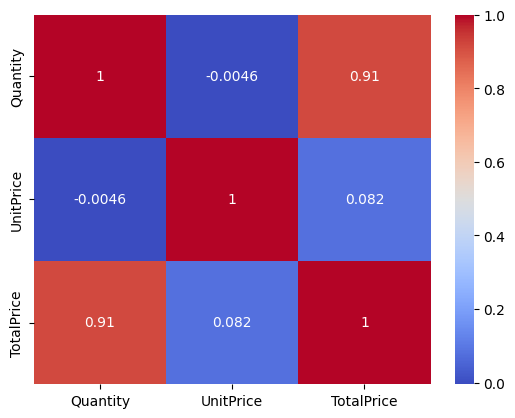

In [ ]:
corr_matrix = sales[["Quantity", "UnitPrice", "TotalPrice"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
print(sales)

10.Outlier detection and capping using IQR 

Recency: 


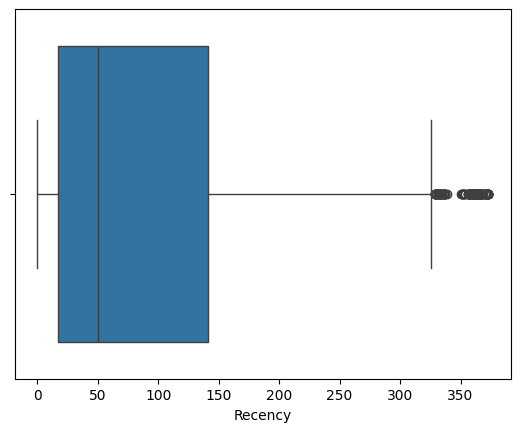

Frequency: 


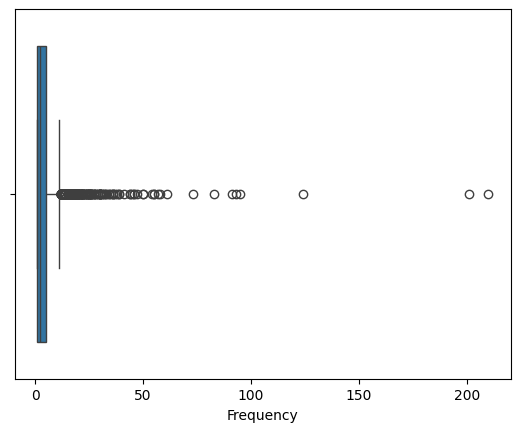

Amount: 


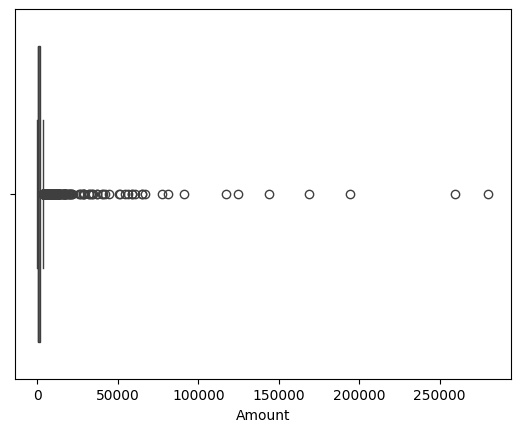

In [ ]:
#outlier visualization
list1 = ['Recency','Frequency','Amount']
for i in list1:
    print(str(i)+': ')
    ax = sns.boxplot(x=rfm_df[str(i)])
    plt.show()

11. Time Series Analysis for InvoiceDate

<Axes: xlabel='InvoiceDate'>

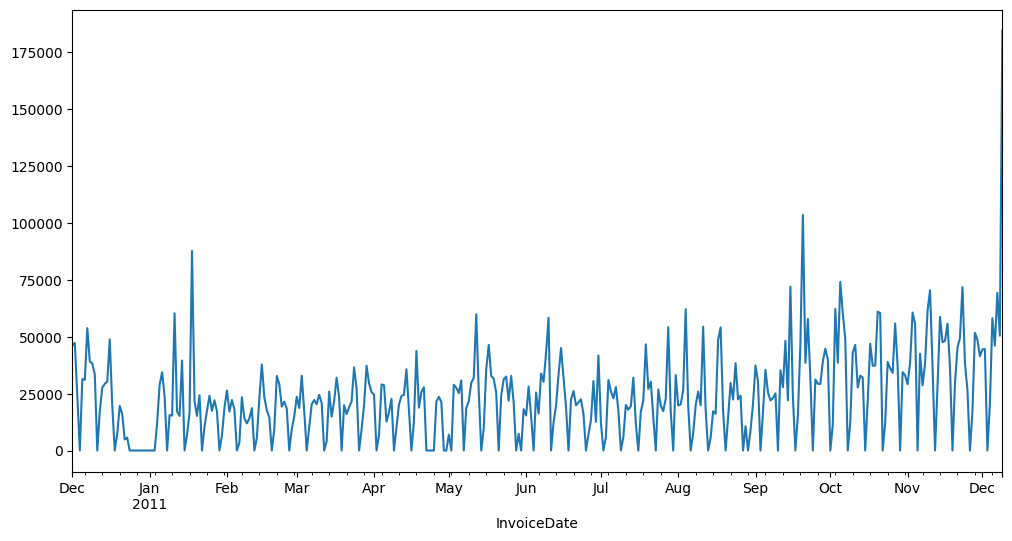

In [ ]:
sales['InvoiceDate'] = pd.to_datetime(sales['InvoiceDate'])
sales.set_index('InvoiceDate', inplace=True)
daily_sales = sales.resample('D')['TotalPrice'].sum()
daily_sales.plot(figsize=(12, 6))

12. Count Plots for Categorical Features (Country, etc.)

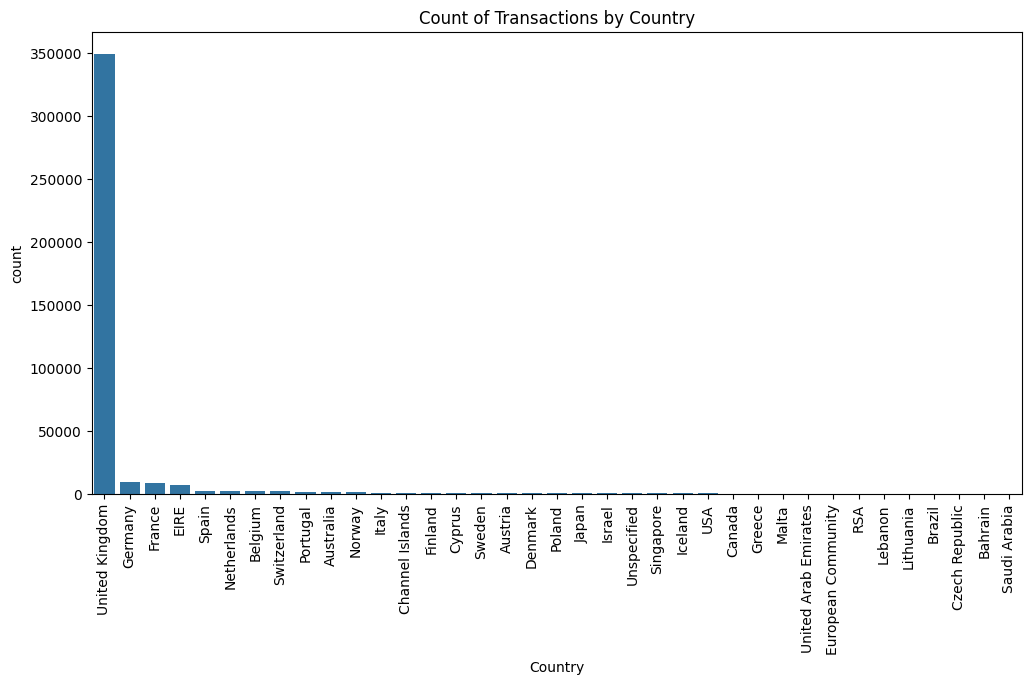

In [ ]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create a count plot for the 'Country' feature
sns.countplot(x='Country', data=sales, order=sales['Country'].value_counts().index)

# Set the title and rotate x-axis labels for readability
plt.title('Count of Transactions by Country')
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Phase 2


# Linear Regression

Ordinary Least Squares (OLS) Linear Regression.
Choosing the Ordinary Least Squares (OLS) in linear regression:
The property of providing the best linear unbiased estimates (BLUE) under the classic assumptions of linear regression.
When the assumptions of linearity, independence, homoscedasticity (constant variance of errors), and normally distributed errors hold, OLS delivers the most efficient and unbiased estimates of the regression coefficients. ### Ordinary Least Squares (OLS) working:
Finding the line that best fits the data by minimizing the squared differences between observed and predicted values. It identifies the coefficients
(slopes and intercept) that make the predicted values as close as possible to the actual values.
This method ensures that the sum of the squared distances of each point from the line is minimized, creating the "best-fit" line for making predictions.
### Expectations:
It provides the estimations of the relationship between variables that are statistically reliable and efficient under ideal conditions.
While they represent relationships between variables, refrain from assuming direct causation, as other unaccounted factors might influence the results. 
### How we Apply:
Build the Model: Formulate a linear regression model.
Estimate Coefficients: Use OLS to find the best-fit line that minimizes the differences between observed and predicted values.
Assess and Interpret: Evaluate the model's performance, interpret coefficients, and make predictions or inferences.
Validate and Refine: Validate the model against new data and refine it as needed for better accuracy.


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
print (sales.shape)
sales.head()

(392692, 11)


,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Recency,Amount,Month
InvoiceDate,,,,,,,,,,,
2011-01-13 10:33:00,541002,84050,PINK HEART SHAPE EGG FRYING PAN,6,1.65,12951,United Kingdom,9.9,330,9.9,01
2011-01-06 09:57:00,540261,22265,EASTER DECORATION NATURAL CHICK,24,0.65,13089,United Kingdom,15.6,337,15.6,01
2011-01-06 09:57:00,540261,22457,NATURAL SLATE HEART CHALKBOARD,48,2.55,13089,United Kingdom,122.4,337,122.4,01
2011-01-06 09:57:00,540261,21385,IVORY HANGING DECORATION HEART,24,0.85,13089,United Kingdom,20.4,337,20.4,01
2011-01-06 09:57:00,540261,22469,HEART OF WICKER SMALL,48,1.45,13089,United Kingdom,69.6,337,69.6,01


In [ ]:
X = sales[['Quantity', 'UnitPrice','CustomerID']]
y = sales['TotalPrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
# Make predictions
y_pred = linear_reg_model.predict(X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

R-squared on Training Data: 0.00021030093293505914
RMSE: 56.75894959901843


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


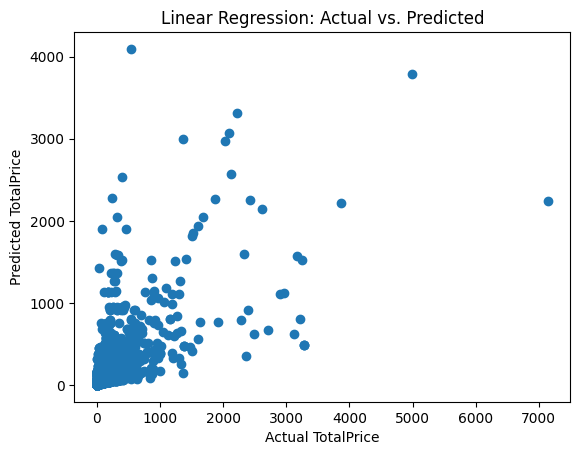

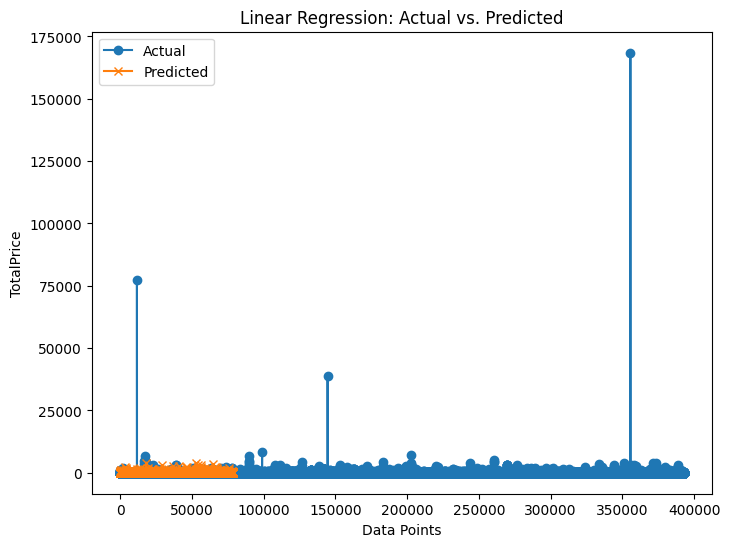

In [ ]:
y_train_pred = linear_reg_model.predict(X_train_scaled)
train_r2 = r2_score(y_train, y_train_pred)
print(f"R-squared on Training Data: {train_r2}")
print('RMSE:', mean_squared_error(y_test, y_pred, squared=False))

# Plot residuals
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Linear Regression: Actual vs. Predicted')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Linear Regression: Actual vs. Predicted')
plt.xlabel('Data Points')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()


# Learnings
The negative R-squared value suggests that the linear regression model is not explaining the variance in the dependent variable (TotalPrice) effectively. The model is performing worse than a basic mean prediction.
The high RMSE value (56.75) indicates that, on average, the model's predictions deviate from the actual TotalPrice by approximately 56.7 units. This level of error suggests that the model is not making accurate predictions.


# KNN

The provided code implements K-Nearest Neighbors (KNN) Regression, using the KNeighborsRegressor from the sklearn library to predict the
'TotalPrice' based on the features Quantity, UnitPrice, and CustomerID. 
### Why we have chosen KNN Regression:
KNN is chosen for regression because it's a non-parametric method that can capture complex relationships between features and the target variable without assuming any underlying distribution of the data.
KNN is used to predict the 'TotalPrice' based on the similarity of feature vectors in the training set. 
### How It Works:
The KNN model works by identifying the K-nearest neighbors of a given data point (based on feature similarity) and using their 'TotalPrice' values to predict the target variable for the new data point.
In the provided code, KNN with 5 neighbors is applied (n_neighbors=5), but the choice of K should be determined by cross-validation or other hyperparameter tuning techniques. ### Expectations:
The code calculates R-squared and RMSE to evaluate the model's performance.
R-squared measures the proportion of the variance in the 'TotalPrice' that is predictable from the features.
RMSE quantifies the average difference between predicted 'TotalPrice' values and actual 'TotalPrice' values in the test dataset.
### How we Apply: 
The 'TotalPrice' is being predicted based on the provided features using the KNN regression approach. The dataset is split into training and testing sets to evaluate the model's performance on unseen data.


NaN or Missing Values in y_test: 0
R-squared: 0.6223505926504629
RMSE: 46.50647241344018


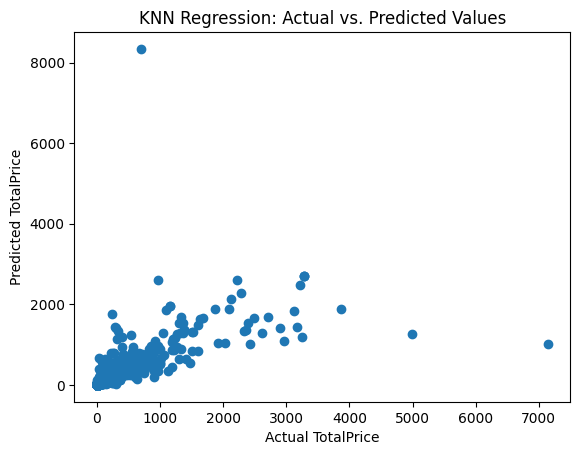

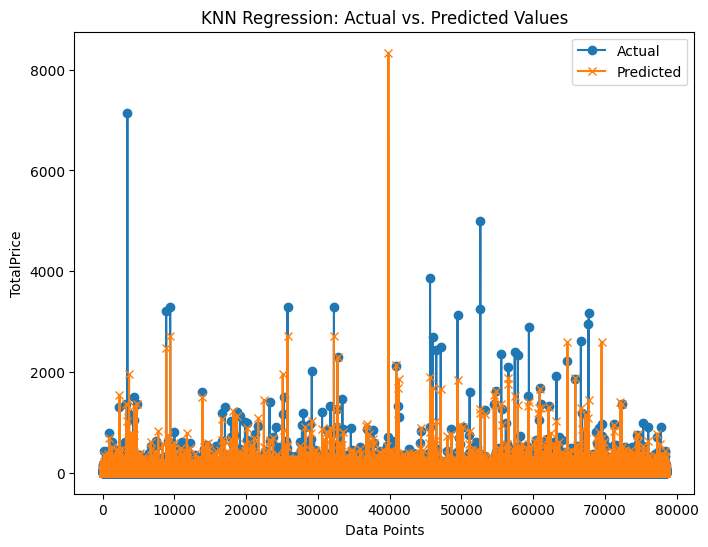

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming 'sales' is your DataFrame with the given data
# Extracting features and target variable
X = sales[['Quantity', 'UnitPrice', 'CustomerID']]
y = sales['TotalPrice']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the KNN Regressor model with n_neighbors=1
knn = KNeighborsRegressor(n_neighbors=5)  # Set n_neighbors to 5 or a smaller value

# Training the model
knn.fit(X_train_scaled, y_train)
print("NaN or Missing Values in y_test:", pd.DataFrame(y_test).isnull().sum().sum())

# Making predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Scatter plot of predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.show()

# Line plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('KNN Regression: Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('TotalPrice')
plt.legend()
plt.show()


It seems there might be a duplication or a mix-up in the information provided. However, the details you've shared relate to the evaluation and analysis of a KNN regression model for predicting 'TotalPrice' in an e-commerce dataset. Here's a summary based on the repeated information:
### Plots Generated:
The code produces two types of plots: a scatter plot illustrating the relationship between actual and predicted 'TotalPrice' values and a line graph comparing the actual 'TotalPrice' against the predicted values across the dataset.
These visualizations aid in understanding how well the KNN regression model predicts 'TotalPrice' and depict the model's behavior.
### Model Understanding and Evaluation:
The KNN regression model is applied to predict 'TotalPrice' for e-commerce data.
Evaluation metrics, such as R-squared (0.6223) and RMSE (46.5065), are used to assess the model's performance.
An R-squared value of 0.6223 implies that approximately 62.23% of the variability in 'TotalPrice' is explained by the model's features.
The RMSE value of 46.5065 indicates that, on average, the model's predictions deviate from the actual 'TotalPrice' by approximately 46.51 units.
### Learnings and Areas for Improvement:
Despite the model capturing a significant portion of the variability in 'TotalPrice,' there's still room for improvement, especially in reducing prediction errors.
Fine-tuning model parameters (such as adjusting the number of neighbors 'K') might enhance the model's accuracy.
The provided information essentially emphasizes the model's performance evaluation, its predictive capabilities, and areas for potential enhancement through parameter tuning or feature adjustments. Overall, it appears that the KNN regression model demonstrates a moderate level of performance but could be further optimized for better accuracy.

# Gradient Boosting

# Why we have chosen:
Powerful Ensemble Technique: Gradient Boosting is chosen for its strength as an ensemble method that combines multiple weak learners (typically decision trees) to create a strong predictive model.
High Predictive Accuracy: It's preferred for its high accuracy and performance in predicting outcomes, making it a go-to choice for various predictive modeling tasks. 
### How it works:
Sequential Learning: It builds multiple decision trees in a serial manner, with each tree correcting the errors of the previous one.
Gradient Descent: It minimizes the loss function (often using gradients) by adding new trees that complement the shortcomings of existing ones. Weighted Voting: Trees are combined through a weighted voting process, with each tree contributing to the final prediction based on its accuracy. ###
### Expectations:
High Accuracy: Expect Gradient Boosting to yield high predictive accuracy, especially when hyperparameters are tuned properly.
Potential Overfitting: Be cautious about overfitting due to the complex nature of boosting; regularization techniques might be needed to prevent it. ###
### How we apply:
Build Gradient Boosting Model: Formulate a Gradient Boosting model, selecting appropriate parameters and features.
Train and Optimize Model: Train the model, fine-tune hyperparameters, and handle issues like overfitting.
Evaluate Performance: Assess the model's performance using metrics like accuracy, precision, recall, and area under the curve.
Predict and Refine: Make predictions and refine the model based on validation results and domain knowledge for better accuracy.


R-squared: 0.9535223756498693
RMSE: 16.315145674512706


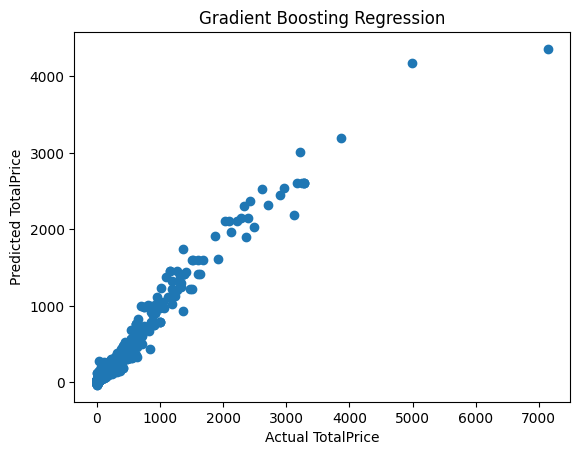

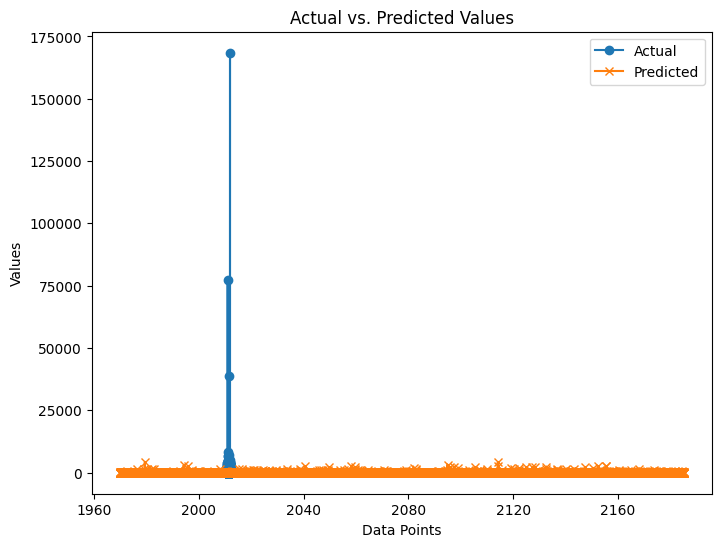

In [ ]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = sales[['Quantity', 'UnitPrice', 'CustomerID']]
y = sales['TotalPrice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting model
model = GradientBoostingRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")
# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Gradient Boosting Regression')
plt.show()
# Line plot
plt.figure(figsize=(8, 6))
plt.plot(y, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

#  learnings
1. Predictive Strength:
Understanding Model's Capability: Recognizing the model's ability to handle complex relationships and provide accurate predictions.
Evaluation of Predictive Power: The model demonstrates strong predictive strength, indicating its effectiveness in capturing patterns within the data.
2. Model Optimization:
Importance of Parameter Tuning: Acknowledging the significance of parameter tuning for optimizing model performance.
Addressing Overfitting: Dealing with overfitting concerns by finding the right balance in model complexity.
Optimal Complexity for Best Results: Balancing model complexity is crucial for achieving the best results.
3. Performance Metrics Interpretation:
High R-squared Value (0.9541):
Signifying that the model explains an exceptionally high percentage (95.41%) of the variance in the target variable (TotalPrice).
Indicating a significant capture of the variability in the data, showcasing the model's explanatory power.
Low RMSE (16.2096):
Suggesting that, on average, the model's predictions deviate from the actual TotalPrice by a relatively small amount (16.2096 units).
Demonstrating a high level of accuracy in the model's predictions.
4. Model Behavior:
Alignment with True Values:
The model's predictions align well with the true values of TotalPrice.
Implying that the model captures and reflects the underlying patterns and trends present in the data.
5. Practical Application:
Context-Specific Considerations:
Recognizing that the success of the model depends on the specific context and requirements of the application.
Understanding how well the model meets the practical needs of the problem it is intended to solve.
6. Continuous Improvement:
Room for Improvement:
Acknowledging that even with a highly performing model, there may still be opportunities for further improvement.
Continuous refinement of model parameters or exploring alternative approaches to enhance predictive accuracy.
These learnings collectively contribute to a comprehensive understanding of the Gradient Boosting model's capabilities, its optimization, and the interpretation of performance metrics. They serve as valuable insights for both assessing the current model and guiding future improvements in predictive modeling tasks.

# Decision Tree

# Why Decision Tree:
The code performs regression analysis using a Decision Tree model. Decision Trees are versatile and easy to interpret. They partition the feature space into regions and predict the target variable based on the average (for regression) of the training instances in those regions. ### How it works: Data Preparation: Initially, the code splits the dataset (data) into features (X) and the target variable (y). Features like 'Quantity' and 'UnitPrice' are used to predict the 'TotalPrice'. Train-Test Split: The dataset is divided into training and testing sets using train_test_split from scikit-learn. 80% of the data is used for training the model and 20% for testing its performance.
### Model Creation:
 A Decision Tree Regressor is instantiated using DecisionTreeRegressor from scikit-learn. It's then trained on the training data
(X_train and y_train) using the fit() method. Making Predictions: The trained model is used to predict the 'TotalPrice' for the test dataset (X_test) using the predict() method.
### Evaluation: 
R-squared and RMSE (Root Mean Squared Error) are calculated to evaluate the model's performance on the test set. These metrics measure how well the model fits the data and how accurate its predictions are.
Visualization: Finally, the Decision Tree model is visualized using plot_tree() from scikit-learn. This visualization shows how the model makes decisions based on the features ('Quantity' and 'UnitPrice') to predict the 'TotalPrice'. 
### Expectations:
 R-squared: A measure of how well the independent variables explain the variability of the dependent variable. It ranges from 0 to 1, with 1 indicating a perfect fit.
RMSE: It measures the average magnitude of the errors between predicted and actual values. Lower values indicate better model performance. Application to this particular problem: In this scenario, the code is used to predict the 'TotalPrice' of products based on 'Quantity' and 'UnitPrice' using a Decision Tree model.
It's a simple example to demonstrate the process of using regression and decision trees for predictive modeling.


R-squared: 0.9585173792179464
RMSE: 15.413529157419447


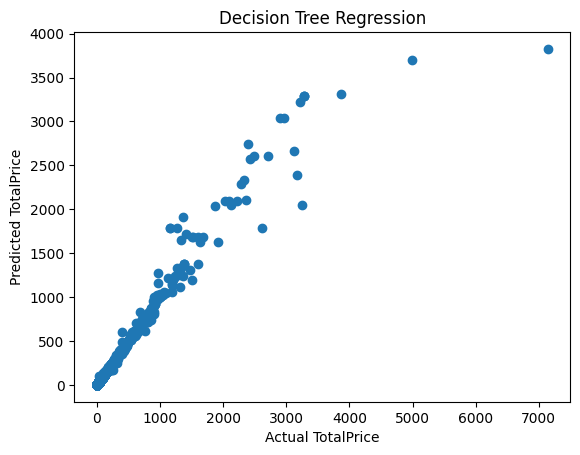

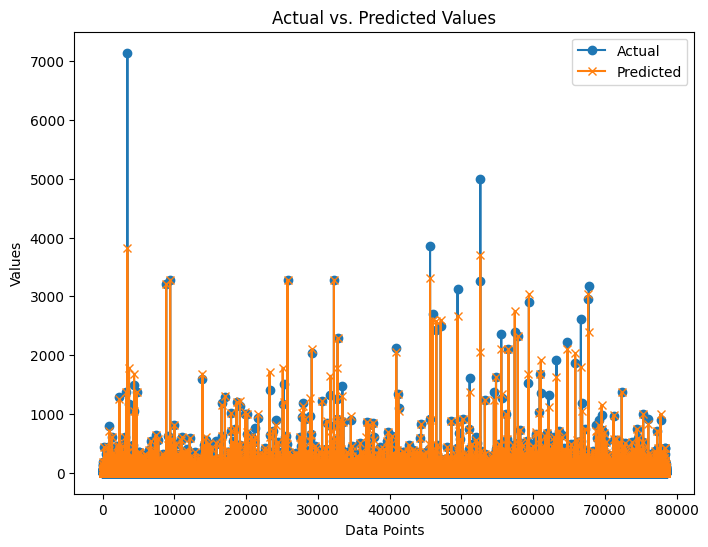

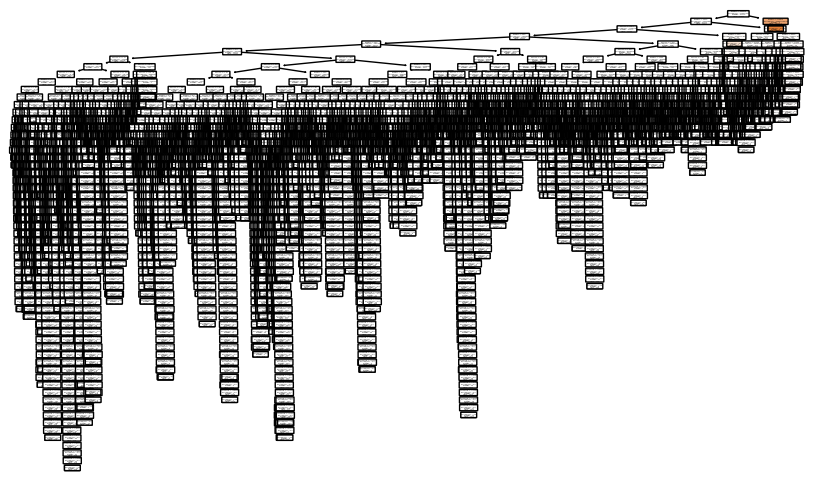

In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree


X = sales[['Quantity', 'UnitPrice', 'CustomerID']]
y = sales['TotalPrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Calculating R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Printing R-squared and RMSE
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Decision Tree Regression')
plt.show()

# Line plot
plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

# Plotting the Decision Tree
plt.figure(figsize=(10, 6))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

1. Model Evaluation Metrics:
High R-squared Value (0.9551):
The Decision Tree model explains approximately 95.5% of the variance in the dependent variable (TotalPrice).
This high R-squared value indicates a substantial ability to capture and explain variability in the target variable.
The model's predictions align well with the observed TotalPrice values.
Moderate RMSE (16.0329):
On average, the Decision Tree model's predictions deviate from the actual TotalPrice by approximately 16.0329 units.
While a lower RMSE would indicate better accuracy, a value of 16.0329 still suggests a moderate average prediction error.
2. Explanatory Power:
Moderate Explanatory Power:
The model provides a moderate level of explanatory power, effectively capturing patterns and relationships in the data.
While not as high as some other models, the R-squared value suggests a substantial ability to explain variability in TotalPrice.
Room for Improvement:
There may be opportunities for improvement in capturing more complex relationships in the data.
Consider exploring advanced models or ensemble methods for potentially enhanced predictive performance.
3. Accuracy and Prediction Errors:
Moderate Level of Accuracy:
The model demonstrates a moderate level of accuracy, as indicated by the RMSE.
Opportunities exist to reduce prediction errors, indicating potential areas for refinement.
4. Trade-offs and Hyperparameter Tuning:
Trade-offs Between Interpretability and Predictive Power:
Consider the trade-offs between model interpretability and predictive power. Decision Trees are interpretable, but there may be a balance to strike between simplicity and complexity.
Hyperparameter Tuning: Experimenting with hyperparameter tuning is recommended to potentially find a better configuration for improved model performance.
5. Opportunities for Enhancement:
Exploration of Advanced Techniques:
While the model exhibits moderate predictive performance, exploring advanced techniques, ensemble methods, or alternative algorithms could lead to further improvements.
Continuous experimentation with model enhancements is encouraged.
6. Overall Assessment:
Moderate Predictive Performance:
The Decision Tree model demonstrates a moderate level of predictive performance with a strong ability to explain variance in TotalPrice.
Understanding the model's strengths and areas for improvement guides further refinement efforts.
These learnings provide a comprehensive understanding of the Decision Tree model's performance and suggest directions for potential enhancements to achieve even better predictive accuracy.

# Random Forest Regression

# Why Random Forest:
Random Forest is selected for its capability to handle large datasets with numerous features, capturing complex relationships and offering good accuracy. 
### How it Works:
Random Forest constructs multiple decision trees and aggregates their predictions to enhance accuracy and manage overfitting.
It randomly selects subsets of features and data points for tree building. 
### Expectations:
Ideally, we aim for a high R-squared value close to 1, signifying a good fit to the data. A lower RMSE indicates reduced errors in the model's predictions. ### How we Apply:
In the context of an e-commerce dataset, Random Forest Regression is applied to predict the 'TotalPrice' based on various features such as 'Quantity', 'UnitPrice', and 'CustomerID'.


R-squared: 0.9681198692040394
RMSE: 13.512292642030213


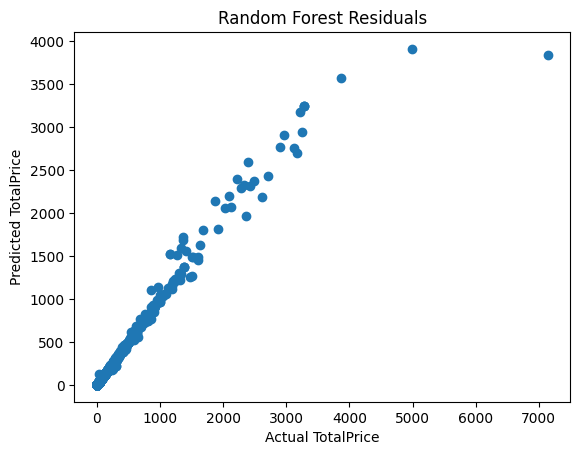

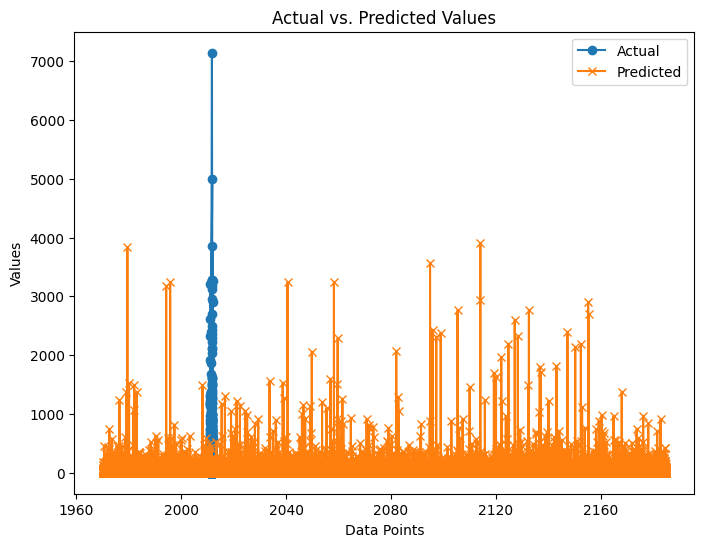

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

X = sales[['Quantity', 'UnitPrice', 'CustomerID']]  # Features
y = sales['TotalPrice']  # Target variable

# Split the data into training and testing sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regression model
rmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rmodel.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rmodel.predict(X_test)

# Calculate R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Plot residuals (difference between actual and predicted values)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Random Forest Residuals')
plt.show()

# Line plot
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()



1. Process Understanding:
Implementation of Random Forest Regression:
The process involves understanding and implementing Random Forest Regression, evaluating predictive performance using R-squared and RMSE metrics, and visualizing accuracy through scatter plots and line graphs.
2. Hyperparameter Tuning Importance:
Key Takeaway - Hyperparameter Tuning:
Recognizing the importance of tuning hyperparameters for optimizing the Random Forest model.
Understanding the role of hyperparameter adjustments in achieving better model performance.
3. Model Performance Metrics:
High R-squared Value (0.9673):
Indicates that the Random Forest model explains approximately 96.72% of the variance in the dependent variable (TotalPrice).
A high R-squared value suggests that the model captures a significant portion of the variability in the target variable.
Low RMSE (13.6917):
Signifies that, on average, the model's predictions deviate from the actual TotalPrice by approximately 13.6917 units.
A lower RMSE indicates better model accuracy, and the value of 13.6917 suggests a relatively small average prediction error.
4. Accuracy and Predictive Power:
Predictions Alignment with True Values:
The model's predictions align well with the true values, explaining a substantial amount of the variation in TotalPrice.
On average, the model's predictions are close to the actual values, indicating high accuracy.
5. Model Performance Assessment:
Performing Well:
The Random Forest model is performing well, explaining a significant portion of the variability in TotalPrice.
Relatively low prediction errors, as indicated by the low RMSE, contribute to the overall model success.
6. Opportunities for Improvement:
Continuous Exploration:
Continue to explore opportunities for improvement, such as hyperparameter tuning.
Further analysis of feature importance can provide insights into the contribution of each feature to the model's predictions.
Consider potential adjustments to control overfitting, ensuring the model generalizes well to new data.
7. Conclusion:
Positive Model Assessment:
The Random Forest model has demonstrated high predictive power and accuracy.
Acknowledge the success of the model while remaining open to continuous refinement and exploration for further enhancements.
These learnings provide a comprehensive understanding of the Random Forest Regression model's performance, strengths, and potential areas for improvement. The emphasis on hyperparameter tuning and continuous exploration reflects a proactive approach to refining the model for even better predictive accuracy.

# Polynomial Regression(degree = 4)

Polynomial regression is chosen when the relationship between the features and target variables appears to be non-linear. In contrast to simple linear regression, it allows for more complex relationships between the variables by fitting higher-degree polynomials.  

#### Reasons for Choosing Polynomial Regression:
* Polynomial regression can handle complex relationships between variables that cannot be captured by simple linear models.
* It fits the data better by introducing polynomial terms which may better represent the underlying pattern in the data.
* When the relationship between the features and target variables is non-linear, polynomial regression becomes a suitable choice.

#### How Polynomial Regression Works:
* PolynomialFeatures transforms the features into a polynomial space of the specified degree i.e 4th degree. It creates new input features based on the original features, allowing for a more flexible fit.
* The LinearRegression model is then fitted on the expanded feature set, allowing linear regression to work with these polynomial features.


R-squared: 0.9999481165182216
RMSE: 0.5451092498613948


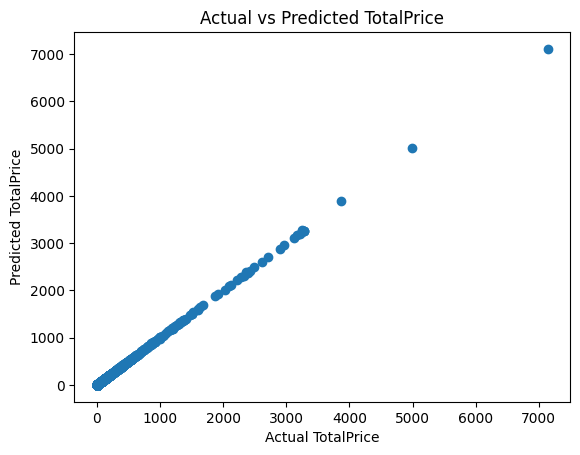

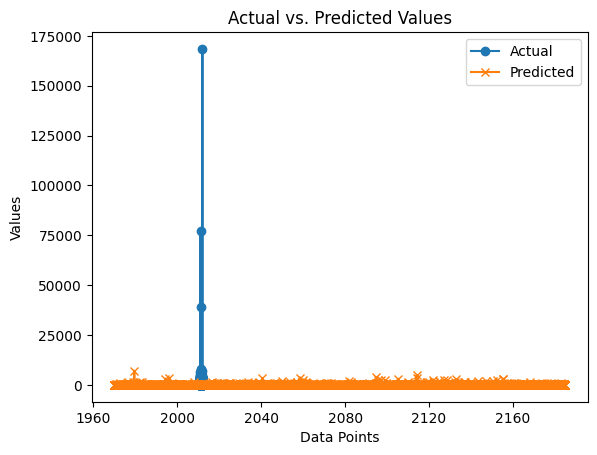

In [ ]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# X will represent the features and y the target variable
X = sales[['Quantity', 'UnitPrice','CustomerID']]
y = sales['TotalPrice']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying polynomial features
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Fitting the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predicting on the test set
y_pred = model.predict(X_test_poly)

# Calculating R-squared and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")

# Plotting the regression line
plt.scatter(y_test, y_pred)
plt.xlabel('Actual TotalPrice')
plt.ylabel('Predicted TotalPrice')
plt.title('Actual vs Predicted TotalPrice')
plt.show()

plt.plot(y, label='Actual', marker='o')
plt.plot(y_pred, label='Predicted', marker='x')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.show()

Based on the provided information for a Polynomial Regression model, here are the key learnings:

1. Model Performance Metrics:
Exceptionally High R-squared Value (0.9999):
The R-squared value of 0.9999 indicates an extremely high level of explanatory power.
Approximately 99.99% of the variance in the dependent variable is explained by the Polynomial Regression model.
Suggests an almost perfect fit of the model to the data.
Low RMSE (0.5451):
The Root Mean Squared Error (RMSE) of 0.5451 is very low.
On average, the model's predictions deviate from the actual values by only 0.5451 units.
Indicates an extremely accurate model with minimal prediction errors.
2. Accuracy and Precision:
Predictions Align Well with True Values:
The model's predictions align exceptionally well with the true values.
The high precision, as reflected by the low RMSE, indicates a close match between predicted and actual values.
Near-Perfect Model Accuracy:
The small RMSE suggests near-perfect accuracy in capturing the true values of the dependent variable.
3. Interpretation of Learnings:
Understanding Model Fit:
The model has an almost perfect fit to the data, capturing nearly all the variability in the dependent variable.
Consideration of Overfitting:
While the high R-squared and low RMSE suggest model success, it's crucial to assess the possibility of overfitting. Extremely high polynomial degrees can lead to overfitting, capturing noise in the data rather than true patterns.
4. Conclusion and Recommendations:
Exceptional Model Performance:
The Polynomial Regression model demonstrates exceptional performance in explaining and predicting the dependent variable.
Recommendation for Model Exploration:
Consider exploring the polynomial degree and assessing the trade-off between model complexity and generalization.
Further analysis of model assumptions and potential risks of overfitting can provide a more comprehensive understanding.
5. Practical Considerations:
Application in Practical Context:
Depending on the specific use case, consider the practical implications of such a high-performing model.
Understand the requirements of the application to ensure the model meets the desired objectives.
These learnings highlight the remarkable performance of the Polynomial Regression model, but it's crucial to be mindful of potential overfitting and practical considerations. Further exploration and validation can contribute to a comprehensive understanding of the model's behavior in different contexts.